In [27]:
import pandas as pd

df = pd.read_csv('../tesla_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  2640 non-null   int64  
 1   Month                 2640 non-null   int64  
 2   Region                2640 non-null   object 
 3   Model                 2640 non-null   object 
 4   Estimated_Deliveries  2640 non-null   int64  
 5   Production_Units      2640 non-null   int64  
 6   Avg_Price_USD         2640 non-null   float64
 7   Battery_Capacity_kWh  2640 non-null   int64  
 8   Range_km              2640 non-null   int64  
 9   CO2_Saved_tons        2640 non-null   float64
 10  Source_Type           2640 non-null   object 
 11  Charging_Stations     2640 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 247.6+ KB


In [4]:
df['Model'].value_counts()

Model
Model S       528
Model X       528
Model 3       528
Model Y       528
Cybertruck    528
Name: count, dtype: int64

In [28]:
model_3 = df.query('Model == "Model 3"')

In [12]:
model_3.head(5)

,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
3,2021,2,North America,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),9333
6,2015,11,Asia,Model 3,7717,7976,87588.21,82,475,549.84,Interpolated (Month),9961
10,2020,11,Asia,Model 3,8319,9154,117946.76,120,670,836.06,Estimated (Region),10165
19,2021,1,Asia,Model 3,7808,8183,102109.35,60,359,420.46,Interpolated (Month),8256
20,2019,5,Middle East,Model 3,13977,14319,57301.92,75,417,874.26,Official (Quarter),13525


In [11]:
model_3.sort_values(by=['Year', 'Month'], ascending=True)

,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
1423,2015,1,Europe,Model 3,7597,8376,80810.67,75,417,475.19,Interpolated (Month),8942
2215,2015,1,Asia,Model 3,8795,9165,87988.73,82,456,601.58,Official (Quarter),12626
2354,2015,1,Middle East,Model 3,11446,12752,89289.40,100,588,1009.54,Estimated (Region),8925
2469,2015,1,North America,Model 3,9446,9528,110632.33,75,435,616.35,Estimated (Region),11496
1353,2015,2,Europe,Model 3,2324,2423,52582.09,120,696,242.63,Interpolated (Month),9032
...,...,...,...,...,...,...,...,...,...,...,...,...
2339,2025,11,Middle East,Model 3,4645,4827,65577.08,82,480,334.44,Interpolated (Month),4017
101,2025,12,Europe,Model 3,16501,18884,108207.45,100,573,1418.26,Interpolated (Month),11849
637,2025,12,Asia,Model 3,8406,8796,70798.20,82,463,583.80,Official (Quarter),13617
978,2025,12,North America,Model 3,12098,12627,58627.89,120,708,1284.81,Official (Quarter),3110


In [29]:
model_3['Date'] = pd.to_datetime(model_3[['Year', 'Month']].assign(DAY=1))
model_3 = model_3.set_index('Date')
model_3 = model_3.sort_index(ascending=True)

C:\Users\Hertz\AppData\Local\Temp\ipykernel_12864\3927113283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_3['Date'] = pd.to_datetime(model_3[['Year', 'Month']].assign(DAY=1))


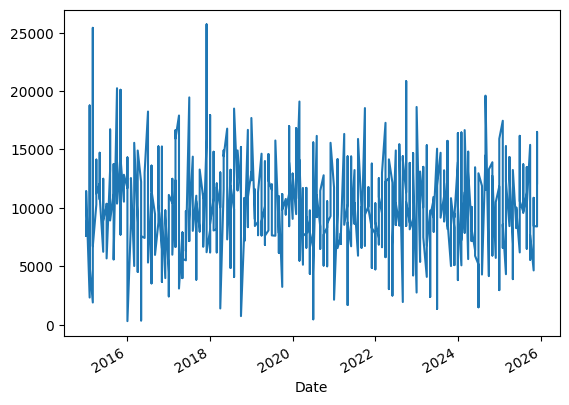

In [30]:
import matplotlib.pyplot as plt

model_3['Estimated_Deliveries'].plot()
plt.show()

In [31]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

series = model_3['Estimated_Deliveries']
model = SimpleExpSmoothing(series).fit(smoothing_level=0.4, optimized=False)

forecast = model.forecast(12)
print(forecast)

528    12218.508702
529    12218.508702
530    12218.508702
531    12218.508702
532    12218.508702
533    12218.508702
534    12218.508702
535    12218.508702
536    12218.508702
537    12218.508702
538    12218.508702
539    12218.508702
dtype: float64


c:\Users\Hertz\Documents\Projetos\timeseries-econometrics-labs\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hertz\Documents\Projetos\timeseries-econometrics-labs\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hertz\Documents\Projetos\timeseries-econometrics-labs\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


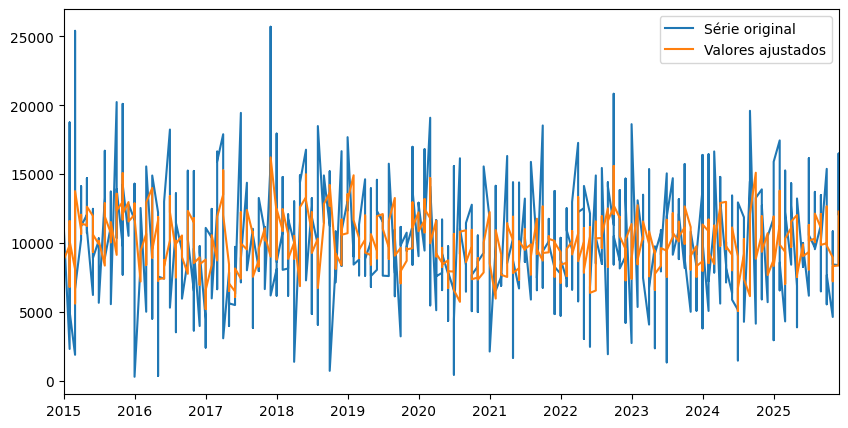

In [32]:
plt.figure(figsize=(10,5))
plt.plot(series, label='Série original')
plt.plot(model.fittedvalues, label='Valores ajustados')
plt.legend()
plt.xlim(series.index.min(), series.index.max())
plt.show()

# Método Holt

c:\Users\Hertz\Documents\Projetos\timeseries-econometrics-labs\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


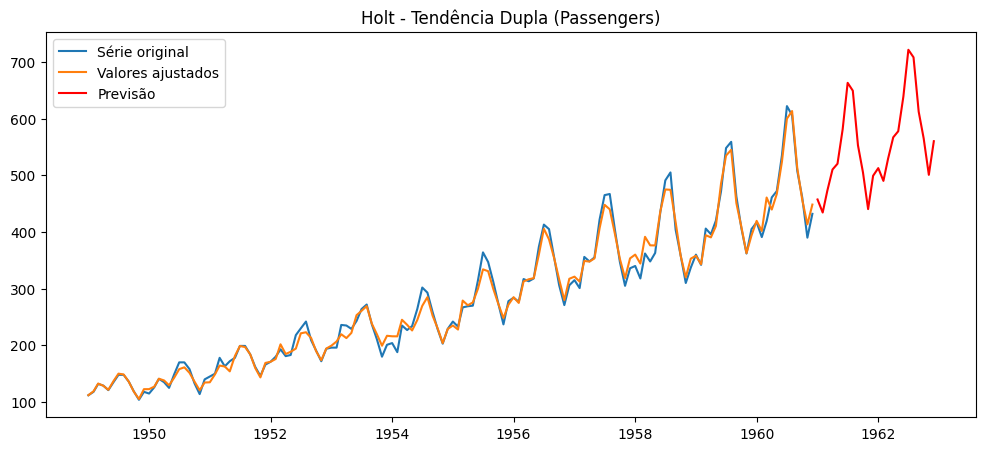

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing

# Carregar dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)

data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Série
y = data['Passengers']

# Modelo Holt (Tendência)
#holt_model = Holt(y).fit(smoothing_level=0.8, smoothing_slope=0.2)

# Ajuste + previsão
#fitted = holt_model.fittedvalues
#forecast = holt_model.forecast(24)

hw_model = ExponentialSmoothing(
    y,
    seasonal='add',
    trend='mul',
    seasonal_periods=12
).fit()

# Novo ajuste + previsão
fitted_hw = hw_model.fittedvalues
forecast_hw = hw_model.forecast(24) # 24 meses

# Plot
plt.figure(figsize=(12,5))
plt.plot(y, label='Série original')
plt.plot(fitted_hw, label='Valores ajustados')
plt.plot(forecast_hw, label='Previsão', color='red')
plt.legend()
plt.title("Holt - Tendência Dupla (Passengers)")
plt.show()


In [34]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing

# Para calcular o RMSE
from sklearn.metrics import mean_squared_error

# 1. Carregar dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
y = data['Passengers']

# --- A. Modelo Holt-Winters Multiplicativo ---
hw_mul_model = ExponentialSmoothing(
    y,
    seasonal='mul',
    trend='mul',
    seasonal_periods=12
).fit()

# Valores ajustados (previsão dentro da amostra)
fitted_mul = hw_mul_model.fittedvalues

# Calcular o RMSE Multiplicativo
# Remove o primeiro valor nulo (devido à inicialização do modelo)
rmse_mul = np.sqrt(mean_squared_error(y[1:], fitted_mul[1:]))

# --- B. Modelo Holt-Winters Aditivo ---
hw_add_model = ExponentialSmoothing(
    y,
    seasonal='add',
    trend='add',
    seasonal_periods=12
).fit()

# Valores ajustados (previsão dentro da amostra)
fitted_add = hw_add_model.fittedvalues

# Calcular o RMSE Aditivo
# Remove o primeiro valor nulo
rmse_add = np.sqrt(mean_squared_error(y[1:], fitted_add[1:]))

print(f"RMSE do Holt-Winters Multiplicativo: {rmse_mul:.2f}")
print(f"RMSE do Holt-Winters Aditivo: {rmse_add:.2f}")

c:\Users\Hertz\Documents\Projetos\timeseries-econometrics-labs\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Hertz\Documents\Projetos\timeseries-econometrics-labs\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE do Holt-Winters Multiplicativo: 10.51
RMSE do Holt-Winters Aditivo: 12.28


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.holtwinters import Holt

# 1. Carregar Dataset Financeiro Real com yfinance
TICKER = '^GSPC' # Símbolo do S&P 500
START_DATE = '2019-01-01' # Dados dos últimos ~5 anos

print(f"Buscando dados do {TICKER}...")

# Obter dados de fechamento ajustados (Adjusted Close)
data = yf.download(TICKER, start=START_DATE, auto_adjust=False)

data

Buscando dados do ^GSPC...


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2019-01-02,2510.030029,2510.030029,2519.489990,2467.469971,2476.959961,3733160000
2019-01-03,2447.889893,2447.889893,2493.139893,2443.959961,2491.919922,3858830000
2019-01-04,2531.939941,2531.939941,2538.070068,2474.330078,2474.330078,4234140000
2019-01-07,2549.689941,2549.689941,2566.159912,2524.560059,2535.610107,4133120000
2019-01-08,2574.409912,2574.409912,2579.820068,2547.560059,2568.110107,4120060000
...,...,...,...,...,...,...
2025-11-10,6832.430176,6832.430176,6841.319824,6770.560059,6785.359863,5366050000
2025-11-11,6846.609863,6846.609863,6855.129883,6806.870117,6815.640137,4983490000


c:\Users\Hertz\Documents\Projetos\timeseries-econometrics-labs\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hertz\Documents\Projetos\timeseries-econometrics-labs\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hertz\Documents\Projetos\timeseries-econometrics-labs\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


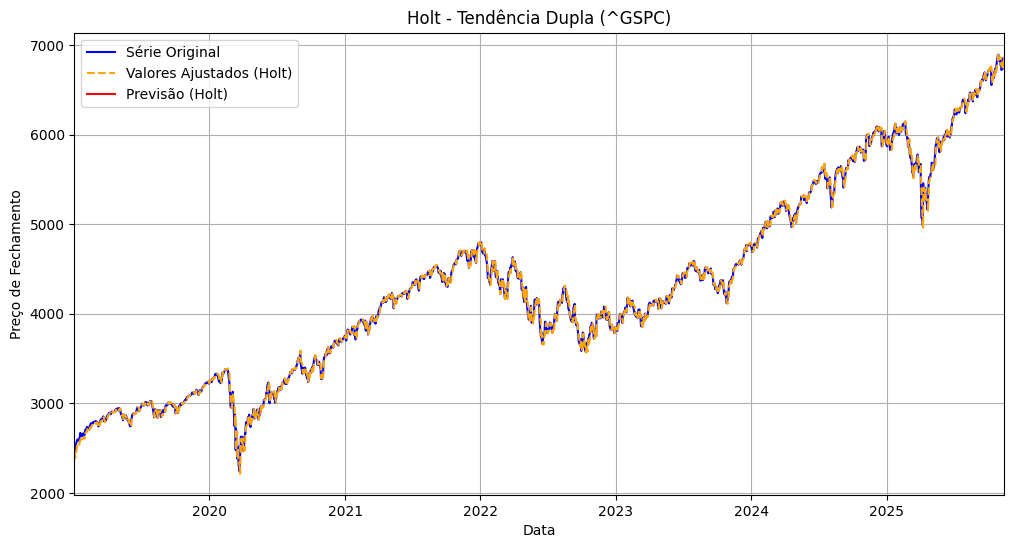

In [36]:
# Selecionar a série de tempo de fechamento ajustado
y = data['Adj Close']
y.name = f'{TICKER} - Fechamento Ajustado'


# 2. Definir e Treinar o Modelo Holt (Tendência)
# O modelo de Holt (Dupla Suavização Exponencial) lida com Nível e Tendência.
# Usamos optimized=True para que o modelo encontre os melhores parâmetros alfa e beta.
holt_model_financeiro = Holt(y).fit(optimized=True)

# 3. Ajuste e Previsão
fitted_financeiro = holt_model_financeiro.fittedvalues
# Prever os próximos 30 dias de negociação
forecast_financeiro = holt_model_financeiro.forecast(30)

# 4. Plotar o Resultado
plt.figure(figsize=(12, 6))
plt.plot(y, label='Série Original', color='blue')
plt.plot(fitted_financeiro, label='Valores Ajustados (Holt)', color='orange', linestyle='--')
plt.plot(forecast_financeiro, label='Previsão (Holt)', color='red')
plt.title(f"Holt - Tendência Dupla ({TICKER})")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento")
plt.legend()
plt.grid(True)
plt.xlim(data.index.min(), data.index.max())
plt.show()

In [37]:
y_subset = y[1:]
fitted_subset = fitted_financeiro[1:]

# Certificar-se de que não há NaNs e que os tamanhos são iguais
if len(y_subset) != len(fitted_subset):
    print("Atenção: Os comprimentos das séries original e ajustada não correspondem após a remoção do primeiro ponto.")

# Calcular o Mean Squared Error (MSE)
mse = mean_squared_error(y_subset, fitted_subset)

# Calcular o Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"✅ RMSE do Modelo Holt para {TICKER} (Período de {START_DATE} até hoje): {rmse:.2f}")

✅ RMSE do Modelo Holt para ^GSPC (Período de 2019-01-01 até hoje): 49.75


📊 Comparação de Modelos de Suavização Exponencial

| Grupo            | Métodos incluídos                       | RMSE (Exemplo) | Melhor dentro do grupo | Observações                                                                                        |
| ---------------- | --------------------------------------- | -------------: | ---------------------- | -------------------------------------------------------------------------------------------------- |
| **Simples**      | `SES` (Apenas Nível)                    |     **~5 500** | 🟩 `SES`               | Ajuste adequado: captura apenas o nível, ignorando variações aleatórias. Modelo mais parcimonioso. |
| **Holt**         | `Holt` (Nível + Tendência)              |           Alto | 🔴 Não modela          | Tenta modelar uma tendência inexistente, piorando o ajuste.                                        |
| **Holt-Winters** | `HW` (Nível + Tendência + Sazonalidade) |           Alto | 🔴 Não modela          | Complexidade desnecessária. Tenta encontrar padrão onde só há ruído.                               |

➡️ Melhor modelo geral: SES
➡️ Conclusão: O SES é simples, eficiente e ideal para séries estacionárias sem tendência ou sazonalidade.

💰 Cenário 2 — Série com Tendência e Alto Ruído (ex: S&P 500)

| Grupo            | Métodos incluídos          | RMSE (Aprox.) | Melhor dentro do grupo | Observações                                                                            |
| ---------------- | -------------------------- | ------------: | ---------------------- | -------------------------------------------------------------------------------------- |
| **Simples**      | `SES` (Apenas Nível)       |    Muito Alto | 🔴 Não modela          | Falha completamente: prevê média constante, ignora o crescimento.                      |
| **Holt**         | `Holt` (Nível + Tendência) |    **~49.75** | 🟦 `Holt`              | Captura bem a tendência. O erro ocorre por ruído diário não modelado.                  |
| **Holt-Winters** | `HW` com sazonalidade      |        ~50.00 | 🟧 Não testado         | A sazonalidade é irrelevante em dados diários — adicionaria parâmetros desnecessários. |

➡️ Melhor modelo geral: Holt
➡️ Conclusão: O Holt é ideal para séries com tendência, mesmo sob alta volatilidade.

✈️ Cenário 3 — Série com Tendência e Sazonalidade (ex: Passageiros Aéreos)

| Grupo            | Métodos incluídos                 | RMSE (Aprox.) | Melhor dentro do grupo | Observações                                                               |
| ---------------- | --------------------------------- | ------------: | ---------------------- | ------------------------------------------------------------------------- |
| **Simples**      | `SES` (Apenas Nível)              |    Muito Alto | 🔴 Não modela          | Ignora tendência e sazonalidade, gerando previsões incorretas.            |
| **Holt**         | `Holt` (Nível + Tendência)        |          Alto | 🟧 `Holt`              | Captura a tendência, mas falha ao ignorar sazonalidade.                   |
| **Holt-Winters** | `HW Aditivo`, `HW Multiplicativo` |    **~10.51** | 🟩 `HW Multiplicativo` | Modelo completo: tendência + sazonalidade crescente. Melhor ajuste geral. |

➡️ Melhor modelo geral: Holt-Winters Multiplicativo
➡️ Conclusão: Séries com sazonalidade exigem suavização exponencial tripla.

⚖️ Resumo Global das Técnicas

| Componentes da Série             | Modelo Ideal      | RMSE Típico | Limitação de um modelo mais simples         |
| -------------------------------- | ----------------- | ----------: | ------------------------------------------- |
| Nível (Estacionária / Ruído)     | 🟩 `SES`          |       Baixo | Holt/HW criam complexidade desnecessária.   |
| Nível + Tendência                | 🟦 `Holt`         |       Médio | SES ignora a tendência.                     |
| Nível + Tendência + Sazonalidade | 🟥 `Holt-Winters` |       Baixo | Holt ignora sazonalidade → erro estrutural. |
